# Using machine learning to predict loan default

### About the company: 
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[1](http://www.businessinsider.com/r-avantcredit-raises-225-million-from-tiger-global-peter-thiel-2014-12) It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.[2](https://www.economist.com/blogs/schumpeter/2013/01/lending-club) The company claims that $15.98 billion in loans had been originated through its platform up to December 31, 2015.[3](https://www.lendingclub.com/info/statistics.action)

LendingClub enables borrowers to create unsecured personal loans between $1,000 and $40,000. The standard loan period is three years. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.

LendingClub also makes traditional direct to consumer loans, including automobile refinance transactions, through WebBank, an FDIC-insured, state-chartered industrial bank that is headquartered in Salt Lake City Utah. The loans are not funded by investors but are assigned to other financial institutions.

The company raised $1 billion in what became the largest technology IPO of 2014 in the United States. Though viewed as a pioneer in the fintech industry and one of the largest such firms, LendingClub experienced problems in early 2016, with difficulties in attracting investors, a scandal over some of the firm's loans and concerns by the board over CEO Renaud Laplanche's disclosures leading to a large drop in its share price and Laplanche's resignation.

### Credit Risk 
When initially founded, LendingClub positioned itself as a social networking service and set up opportunities for members to identify group affinities, based on a theory that borrowers would be less likely to default to lenders with whom they had affinities and social relationships. **It developed an algorithm called LendingMatch for identifying common relationship factors such as geographic location, educational and professional background, and connectedness within a given social network.**[4](https://www.lendingclub.com/info/how-it-works.action),[5](https://web.archive.org/web/20110713200446/http://blog.lendingclub.com/images/7920.pdf),[6](https://www.usatoday.com/money/perfi/credit/2007-12-25-peerlending-pers_N.htm)

It offers the algorithm as a search tool for investors to find Notes they would like to purchase, using borrower and loan attributes such as the length of a loan term, target weighted average interest rate, borrower credit score, employment tenure, home ownership status, and others.[7](https://www.lendingclub.com/extdata/Clean_As_Filed_20101015.pdf) To reduce default risk, LendingClub focuses on high-credit-worthy borrowers, declining approximately 90% of the loan applications it received as of 2012[8](https://www.lendingclub.com/info/statistics.action) and assigning higher interest rates to riskier borrowers within its credit criteria.[9](https://www.sec.gov/Archives/edgar/data/1409970/000119312512151868/d306143ds1a.htm#rom306143_20) Only borrowers with FICO score of 660 or higher can be approved for loans.[10](https://www.lendingclub.com/public/how-we-set-interest-rates.action)

The statistics on LendingClub's website state that, as of December 31, 2016, 62.3 percent of borrowers report using their loans to refinance other loans or pay credit card debt.[11](https://www.lendingclub.com/info/statistics.action)


### Project goal:
Can we use Machine Learning to build a model that predicts whether a borrower will default on a loan, that matches or exceeds LendingClub's own algorithm?

### We can use two different approaches:
1. Predict loan defaults upon application submission - Using this approach, we would exclude features that would not be availble pre loan (e.g. loan_amount, funded_amount/funded_amount_inv, term, int_rate, installment, etc.)
2. Predict loan defaults after approval and disbursement - Using this approache, we have the full dataset accessible.

For our analysis, we will go with option 1.



*Note: We'll exculde LendingClub's own classification as that information is aleady generted by LC's own algorith.*



In [1]:
# Data wrangling libraries
import pandas as pd
import numpy as np
import pandas_profiling
from scipy.stats import norm
pd.set_option('display.max_columns', None)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Setting up environment in comet.ml
from api_key import api_key
from comet_ml import Experiment
experiment = Experiment(api_key=api_key, project_name='loan_default_prediction')







COMET INFO: Experiment is live on comet.ml https://www.comet.ml/tiroger/loan-default-prediction/dca96ed0c18640718ff55a8b33000af4



In [2]:
# Opening the raw dataset
raw_loan_data_df = pd.read_csv('lending-club/accepted_2007_to_2018Q4.csv', low_memory=False)
experiment.log_dataset_hash(raw_loan_data_df)

## Data Exploration, Cleanup and Feature Selection

In [3]:
raw_loan_data_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [4]:
cols_rows = raw_loan_data_df.shape
print(f'Raw dataset contains {cols_rows[0]} rows and {cols_rows[1]} columns')

Raw dataset contains 2260701 rows and 151 columns


In [5]:
columns = raw_loan_data_df.columns
list(columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [6]:
raw_loan_data_df.describe(exclude=np.object)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.47

In [7]:
missing_values = raw_loan_data_df.isna().sum()/len(raw_loan_data_df) * 100

In [8]:
missing_values

id                         0.00000
member_id                100.00000
loan_amnt                  0.00146
funded_amnt                0.00146
funded_amnt_inv            0.00146
                           ...    
settlement_status         98.48516
settlement_date           98.48516
settlement_amount         98.48516
settlement_percentage     98.48516
settlement_term           98.48516
Length: 151, dtype: float64

In [9]:
missing_value_df = pd.DataFrame(missing_values.sort_values(ascending=False))
missing_value_df.head(50)

,0
member_id,100.000000
orig_projected_additional_accrued_interest,99.617331
hardship_loan_status,99.517097
hardship_dpd,99.517097
hardship_reason,99.517097
hardship_status,99.517097
deferral_term,99.517097
hardship_amount,99.517097
hardship_start_date,99.517097
hardship_end_date,99.517097


First, we remove all features that investors would not have access to prior to loan approval. Second, not all features are intuitively useful for our learning models, such as the loan ID and the month the last payment was received. Moreover, some features are duplicates (e.g. 'loan_amnt','funded_amnt' and 'funded_amnt_inv'). Thus we remove such fields. We also remove fields swith greater than 10% of missing data. We also removed any loans that were missing more than 10% data for any field, unless we can fill-in the missing values. Finally we remove LendingClub's own credit "worthiness" score.

In [10]:
keep_features = [
    #'id',
 #'member_id',
 'loan_amnt',
 #'funded_amnt',
 #'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 #'grade',
 #'sub_grade',
 #'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 #'issue_d',
 'loan_status',
 #'pymnt_plan',
 #'url',
 #'desc',
 'purpose',
 #'title',
 #'zip_code',
 #'addr_state',
 'dti',
 'delinq_2yrs',
 #'earliest_cr_line',
 'fico_range_low',
 #'fico_range_high',
 'inq_last_6mths',
 #'mths_since_last_delinq',
 #'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 #'initial_list_status',
 #'out_prncp',
 #'out_prncp_inv',
 #'total_pymnt',
 #'total_pymnt_inv',
 #'total_rec_prncp',
 #'total_rec_int',
 #'total_rec_late_fee',
 'recoveries',
 #'collection_recovery_fee',
 #'last_pymnt_d',
 #'last_pymnt_amnt',
 #'next_pymnt_d',
 #'last_credit_pull_d',
 #'last_fico_range_high',
 #'last_fico_range_low',
 'collections_12_mths_ex_med',
 #'mths_since_last_major_derog',
 #'policy_code',
 'application_type',
 #'annual_inc_joint',
 #'dti_joint',
 #'verification_status_joint',
 #'acc_now_delinq',
 'tot_coll_amt',
 #'tot_cur_bal',
 #'open_acc_6m',
 #'open_act_il',
 #'open_il_12m',
 #'open_il_24m',
 #'mths_since_rcnt_il',
 #'total_bal_il',
 #'il_util',
 #'open_rv_12m',
 #'open_rv_24m',
 #'max_bal_bc',
 #'all_util',
 'total_rev_hi_lim',
 #'inq_fi',
 #'total_cu_tl',
 #'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 #'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 #'mths_since_recent_bc_dlq',
 #'mths_since_recent_inq',
 #'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 #'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 #'revol_bal_joint',
 #'sec_app_fico_range_low',
 #'sec_app_fico_range_high',
 #'sec_app_earliest_cr_line',
 #'sec_app_inq_last_6mths',
 #'sec_app_mort_acc',
 #'sec_app_open_acc',
 #'sec_app_revol_util',
 #'sec_app_open_act_il',
 #'sec_app_num_rev_accts',
 #'sec_app_chargeoff_within_12_mths',
 #'sec_app_collections_12_mths_ex_med',
 #'sec_app_mths_since_last_major_derog',
 #'hardship_flag',
 #'hardship_type',
 #'hardship_reason',
 #'hardship_status',
 #'deferral_term',
 #'hardship_amount',
 #'hardship_start_date',
 #'hardship_end_date',
 #'payment_plan_start_date',
 #'hardship_length',
 #'hardship_dpd',
 #'hardship_loan_status',
 #'orig_projected_additional_accrued_interest',
 #'hardship_payoff_balance_amount',
 #'hardship_last_payment_amount',
 #'disbursement_method',
 #'debt_settlement_flag',
 #'debt_settlement_flag_date',
 #'settlement_status',
 #'settlement_date',
 #'settlement_amount',
 #'settlement_percentage',
 #'settlement_term'
]


In [11]:
# Removing extraneous columns
pre_disbursement_df = raw_loan_data_df[keep_features]
pre_disbursement_df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collections_12_mths_ex_med,application_type,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,5.91,0.0,675.0,1.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,Individual,722.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,16.06,1.0,715.0,4.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,Individual,0.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,60 months,10.78,432.66,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,10.78,0.0,695.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,Joint App,0.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,35000.0,60 months,14.85,829.90,10+ years,MORTGAGE,110000.0,Source Verified,Current,debt_consolidation,17.06,0.0,785.0,0.0,13.0,0.0,7802.0,11.6,17.0,0.0,0.0,Individual,0.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,87.0,2.0,2.0,1.0,2.0,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0
4,10400.0,60 months,22.45,289.91,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,25.37,1.0,695.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,Individual,0.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0


In [12]:
# We're intested in the loan_status columns
pre_disbursement_df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)



For our analysis, we'll consider only 2 major categories outcomes, "Charged off"/Default and "Fully Paid". A few reasons to do this:

1. To convert it into a binary cassification problem, and to analyze in detail the effect of important variables on the loan status.
2. A lot of observations show status "Current", so we do not know whether it will be "Charged Off", "Fully Paid" or "Default".
3. The observations for "Default" alone are too less as compared to "Fully Paid" or "Charged Off", to thoughroly investigate those observations with loan status as "Default".
4. The remaining categories of "loan status" are not of prime importance for this analysis.



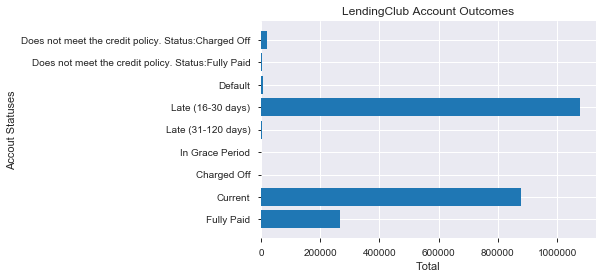

In [13]:
y_pos = list(pre_disbursement_df.groupby('loan_status')['loan_status'].count())
x = pre_disbursement_df.loan_status.dropna().unique()

plt.barh(x, y_pos)
# plt.xticks(x, rotation='vertical')
plt.xlabel('Total')
plt.ylabel('Accout Statuses')
plt.title('LendingClub Account Outcomes')

plt.show()




In [14]:
model_accounts = pre_disbursement_df[(pre_disbursement_df.loan_status == 'Fully Paid') | 
                                     (pre_disbursement_df.loan_status == 'Does not meet the credit policy. Status:Fully Paid') | 
                                     (pre_disbursement_df.loan_status == 'Default') |  
                                     (pre_disbursement_df.loan_status == 'Charged Off') | 
                                     (pre_disbursement_df.loan_status == 'Does not meet the credit policy. Status:Charged Off')
                                    ].copy()

In [15]:
model_accounts.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collections_12_mths_ex_med,application_type,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,5.91,0.0,675.0,1.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,Individual,722.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,16.06,1.0,715.0,4.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,Individual,0.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,60 months,10.78,432.66,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,10.78,0.0,695.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,Joint App,0.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
4,10400.0,60 months,22.45,289.91,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,25.37,1.0,695.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,Individual,0.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
5,11950.0,36 months,13.44,405.18,4 years,RENT,34000.0,Source Verified,Fully Paid,debt_consolidation,10.20,0.0,690.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,Individual,0.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,54.0,32.0,32.0,0.0,36.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0


In [16]:
model_accounts.groupby('loan_status')[['loan_status']].count()

,loan_status
loan_status,
Charged Off,268559
Default,40
Does not meet the credit policy. Status:Charged Off,761
Does not meet the credit policy. Status:Fully Paid,1988
Fully Paid,1076751


In [17]:
# Renaming loan_statuses: 
# Charged Off, Default and Does not meet the credit policy., Status:Charged Off renamed to default
# Does not meet the credit policy. Status:Fully Paid., and 'Fully Paid' renamed to paid
# Source Verified renamed to Verified

model_accounts.loan_status.replace({'Charged Off': 'default', 
                                    'Default': 'default', 
                                    'Does not meet the credit policy. Status:Charged Off': 
                                    'default', 'Fully Paid': 'paid', 
                                    'Does not meet the credit policy. Status:Fully Paid': 'paid'}, inplace=True)

model_accounts.verification_status.replace({'Source Verified': 'verified', 
                                            'Verified': 'verified', 
                                            'Not Verified': 'unverified'}, inplace=True)

In [18]:
model_accounts.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collections_12_mths_ex_med,application_type,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,unverified,paid,debt_consolidation,5.91,0.0,675.0,1.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,Individual,722.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,unverified,paid,small_business,16.06,1.0,715.0,4.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,Individual,0.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,60 months,10.78,432.66,10+ years,MORTGAGE,63000.0,unverified,paid,home_improvement,10.78,0.0,695.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,Joint App,0.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
4,10400.0,60 months,22.45,289.91,3 years,MORTGAGE,104433.0,verified,paid,major_purchase,25.37,1.0,695.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,Individual,0.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
5,11950.0,36 months,13.44,405.18,4 years,RENT,34000.0,verified,paid,debt_consolidation,10.20,0.0,690.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,Individual,0.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,54.0,32.0,32.0,0.0,36.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0


In [19]:
model_accounts.verification_status.unique()

array(['unverified', 'verified'], dtype=object)

In [20]:
model_accounts.loan_status.unique()

array(['paid', 'default'], dtype=object)

In [21]:
model_accounts_shape = model_accounts.shape
rows = model_accounts_shape[0]
cols = model_accounts_shape[1]
print(f'Dataset to build model contains {rows} rows and {cols} columns.')

Dataset to build model contains 1348099 rows and 56 columns.


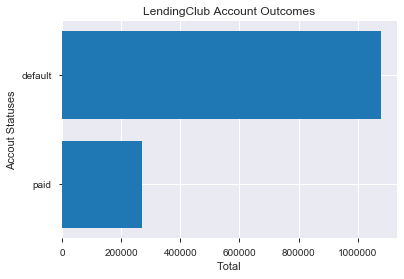

In [22]:
y_pos = list(model_accounts.groupby('loan_status')['loan_status'].count())
x = model_accounts.loan_status.dropna().unique()

plt.barh(x, y_pos)
# plt.xticks(x, rotation='vertical')
plt.xlabel('Total')
plt.ylabel('Accout Statuses')
plt.title('LendingClub Account Outcomes')


plt.savefig('resources/plots/loan_statuses.png', dpi=300)

experiment.log_figure(figure_name='Loan Outcomes', figure=plt)
plt.show()


Note that dataset in extremely imbalanced.

In [23]:
pd.DataFrame((model_accounts.isna().sum().sort_values(ascending=False))).head(30)



,0
emp_length,78550
pct_tl_nvr_dlq,70430
avg_cur_bal,70298
num_rev_accts,70277
mo_sin_rcnt_rev_tl_op,70277
mo_sin_old_rev_tl_op,70277
total_il_high_credit_limit,70276
num_actv_bc_tl,70276
num_actv_rev_tl,70276
num_bc_tl,70276


In [24]:
# Dropping row with missing features
print(f'Before:{model_accounts.shape[0]}')

Before:1348099


In [25]:
no_na_model_accounts = model_accounts.dropna().copy()

In [26]:
print(f'After:{no_na_model_accounts.shape[0]}')

After:1187723


In [27]:
no_na_model_accounts.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
fico_range_low                0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
recoveries                    0
collections_12_mths_ex_med    0
application_type              0
tot_coll_amt                  0
total_rev_hi_lim              0
acc_open_past_24mths          0
avg_cur_bal                   0
bc_open_to_buy                0
bc_util                       0
chargeoff_within_12_mths      0
delinq_amnt                   0
mo_sin_old_rev_tl_op          0
mo_sin_r

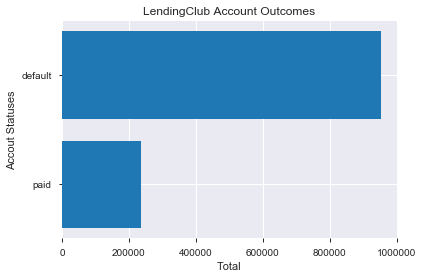

In [28]:
# Making sure ratio is identical after dropping rows with missing values
y_pos = list(no_na_model_accounts.groupby('loan_status')['loan_status'].count())
x = no_na_model_accounts.loan_status.dropna().unique()

plt.barh(x, y_pos)
# plt.xticks(x, rotation='vertical')
plt.xlabel('Total')
plt.ylabel('Accout Statuses')
plt.title('LendingClub Account Outcomes')

plt.show()

In [29]:
# Finding unique values in all columns to determine which features will be categorical
for column in model_accounts:
   unique_values = model_accounts[column].unique()
   unique_values_count = model_accounts[column].nunique()
   value_counts = model_accounts[column].value_counts()
   print(f'{column}: {unique_values}')
   print(f'{column}: {unique_values_count}')
   print(f'{value_counts}')

loan_amnt: [ 3600. 24700. 20000. ... 38125. 37450. 36725.]
loan_amnt: 1560
10000.0    99788
12000.0    73052
20000.0    70427
15000.0    70165
35000.0    51191
           ...  
39625.0        1
39700.0        1
39725.0        1
39875.0        1
37475.0        1
Name: loan_amnt, Length: 1560, dtype: int64
term: [' 36 months' ' 60 months']
term: 2
 36 months    1023206
 60 months     324893
Name: term, dtype: int64
int_rate: [13.99 11.99 10.78 22.45 13.44  9.17  8.49  6.49 11.48 12.88 19.48  7.49
 19.89 14.85  5.32 17.97 24.24 15.77  9.8  17.27 18.49  7.91 23.13 20.5
 16.59 18.99 26.06 21.48  6.99 27.49 26.99 27.99 28.49  6.   25.09 28.99
 16.55  7.89 12.59 13.67 10.64  7.26 17.86 14.48 13.18  6.24  8.38 15.41
  9.76 21.99 16.99 25.99 17.57 18.2  22.99  6.89 11.22 19.99 27.31 20.99
 27.88 23.99 24.99 26.77 12.05  8.18  9.99 11.49 10.99 14.33 16.9  11.53
 18.55 14.65 13.33 12.69 18.25 19.19 12.29 15.61 25.78 19.52 24.5   6.39
  5.93  6.92  6.68 21.67 20.49 25.8  18.84 25.57 25.83 25.89  8

In [30]:
# Droppping rows with 'any', none, and other from the dataframe since they're few
index = no_na_model_accounts[(no_na_model_accounts.home_ownership=='ANY') | (no_na_model_accounts.home_ownership =='NONE') | (no_na_model_accounts.home_ownership =='OTHER')].index
index

Int64Index([  26480,  203353,  553622,  574868,  591301,  607073,  806814,
             828610,  876840,  913320,
            ...
            2179660, 2179729, 2179759, 2179770, 2180776, 2181225, 2206113,
            2209498, 2237397, 2258360],
           dtype='int64', length=342)

In [31]:
no_na_model_accounts.drop(index, inplace=True)

In [32]:
no_na_model_accounts.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [33]:
#profile = model_accounts.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="output.html")

In [34]:
#We will convert the following features to categorical:
#'term', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'application_type'
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(no_na_model_accounts.term)



LabelEncoder()

In [35]:
encoder.classes_

array([' 36 months', ' 60 months'], dtype=object)

In [36]:
no_na_model_accounts.term = encoder.transform(no_na_model_accounts.term)

In [37]:
no_na_model_accounts.term

0          0
1          0
2          1
4          1
5          0
          ..
2260688    1
2260690    1
2260691    1
2260692    1
2260697    1
Name: term, Length: 1187381, dtype: int64

In [38]:
encoder.fit(no_na_model_accounts.emp_length)

LabelEncoder()

In [39]:
encoder.classes_

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year'],
      dtype=object)

In [40]:
no_na_model_accounts.emp_length = encoder.transform(no_na_model_accounts.emp_length)

In [41]:
no_na_model_accounts.emp_length

0          1
1          1
2          1
4          3
5          4
          ..
2260688    5
2260690    9
2260691    3
2260692    1
2260697    6
Name: emp_length, Length: 1187381, dtype: int64

In [42]:
encoder.fit(no_na_model_accounts.home_ownership)

LabelEncoder()

In [43]:
encoder.classes_

array(['MORTGAGE', 'OWN', 'RENT'], dtype=object)

In [44]:
no_na_model_accounts.home_ownership = encoder.transform(no_na_model_accounts.home_ownership)

In [45]:
no_na_model_accounts.home_ownership

0          0
1          0
2          0
4          0
5          2
          ..
2260688    1
2260690    0
2260691    0
2260692    2
2260697    2
Name: home_ownership, Length: 1187381, dtype: int64

In [46]:
encoder.fit(no_na_model_accounts.verification_status)

LabelEncoder()

In [47]:
encoder.classes_

array(['unverified', 'verified'], dtype=object)

In [48]:
no_na_model_accounts.verification_status = encoder.transform(no_na_model_accounts.verification_status)

In [49]:
no_na_model_accounts.verification_status

0          0
1          0
2          0
4          1
5          1
          ..
2260688    0
2260690    0
2260691    1
2260692    0
2260697    0
Name: verification_status, Length: 1187381, dtype: int64

In [50]:
encoder.fit(no_na_model_accounts.purpose)

LabelEncoder()

In [51]:
encoder.classes_

array(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'], dtype=object)

In [52]:
no_na_model_accounts.purpose = encoder.transform(no_na_model_accounts.purpose)

In [53]:
no_na_model_accounts.purpose

0           2
1          11
2           4
4           6
5           2
           ..
2260688     4
2260690     2
2260691     4
2260692     7
2260697     2
Name: purpose, Length: 1187381, dtype: int64

In [54]:
encoder.fit(no_na_model_accounts.application_type)

LabelEncoder()

In [55]:
encoder.classes_

array(['Individual', 'Joint App'], dtype=object)

In [56]:
no_na_model_accounts.application_type = encoder.transform(no_na_model_accounts.application_type)

In [57]:
no_na_model_accounts.application_type

0          0
1          0
2          1
4          0
5          0
          ..
2260688    0
2260690    0
2260691    0
2260692    0
2260697    0
Name: application_type, Length: 1187381, dtype: int64

In [58]:
final_model_data = no_na_model_accounts.copy()

In [59]:
final_model_data.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,collections_12_mths_ex_med,application_type,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,0,13.99,123.03,1,0,55000.0,0,paid,2,5.91,0.0,675.0,1.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,0,722.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,0,11.99,820.28,1,0,65000.0,0,paid,11,16.06,1.0,715.0,4.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,0,0.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,1,10.78,432.66,1,0,63000.0,0,paid,4,10.78,0.0,695.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,1,0.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
4,10400.0,1,22.45,289.91,3,0,104433.0,1,paid,6,25.37,1.0,695.0,3.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,0,0.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
5,11950.0,0,13.44,405.18,4,2,34000.0,1,paid,2,10.20,0.0,690.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,0,0.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,54.0,32.0,32.0,0.0,36.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0


In [60]:
final_model_data.to_csv('lending-club/cleaned_data.csv', index=False)

# Feature Engineering

In [61]:
# Getting all nummerical data
numerical_values = final_model_data.loc[:, final_model_data.columns != 'loan_status']

In [62]:
numerical_values.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'recoveries',
       'collections_12_mths_ex_med', 'application_type', 'tot_coll_amt',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex

### Annual income

In [63]:
numerical_values.annual_inc.describe()

count    1.187381e+06
mean     7.842975e+04
std      7.162536e+04
min      3.300000e+01
25%      4.800000e+04
50%      6.600000e+04
75%      9.372200e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

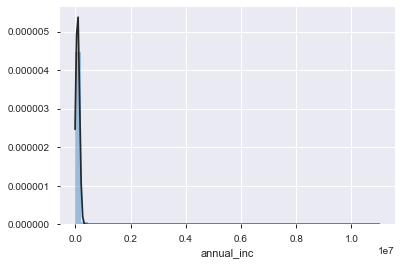

In [64]:
sns.distplot(numerical_values.annual_inc, fit=norm, kde=False)

In [65]:
final_model_data['annual_inc'] = np.log(numerical_values['annual_inc'])

[Text(0, 0.5, 'Annual Income (log)')]

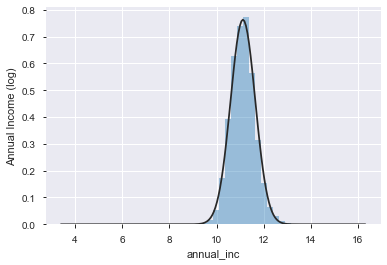

In [66]:
ax = sns.distplot(final_model_data.annual_inc, fit=norm, kde=False)

ax.set(ylabel='Annual Income (log)')

# ax = sns.distplot(x, fit=norm, kde=False)

In [67]:
# Removing outliers
y = final_model_data['annual_inc']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))

In [68]:
print(removed_outliers.value_counts())
# Getting indices of outliers
index_names = final_model_data[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting rows to drop.

True     1079555
False     107826
Name: annual_inc, dtype: int64
Int64Index([      6,      37,      74,      99,     148,     151,     152,
                165,     175,     190,
            ...
            2260465, 2260507, 2260525, 2260527, 2260582, 2260591, 2260599,
            2260674, 2260680, 2260690],
           dtype='int64', length=107826)


In [69]:
# Removing outliers
final_model_data.drop(index_names, inplace=True)

final_model_data.shape

(1079555, 56)

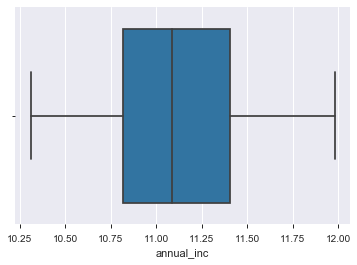

In [70]:
ax = sns.boxplot(x=final_model_data.annual_inc)

### Interest Rate

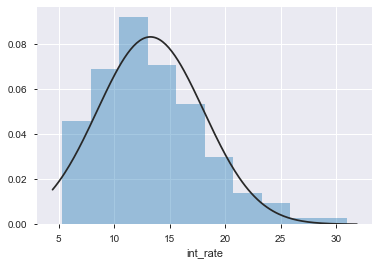

In [71]:
sns.distplot(numerical_values.int_rate, bins=10, fit=norm, kde=False)

In [72]:
final_model_data['int_rate'] = np.log(final_model_data['int_rate'])

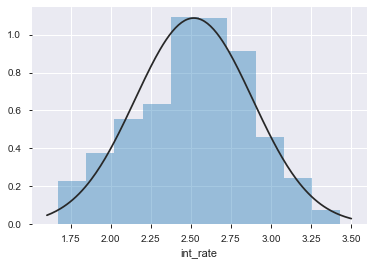

In [73]:
sns.distplot(final_model_data.int_rate, bins=10, fit=norm, kde=False)

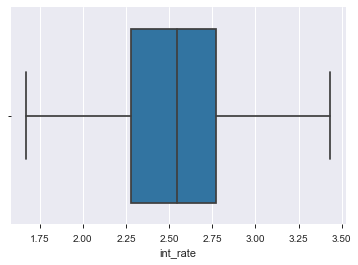

In [74]:
ax = sns.boxplot(x=final_model_data.int_rate)

### Loan Amount

In [75]:
numerical_values.loan_amnt.describe()

count    1.187381e+06
mean     1.477125e+04
std      8.770332e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.260000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

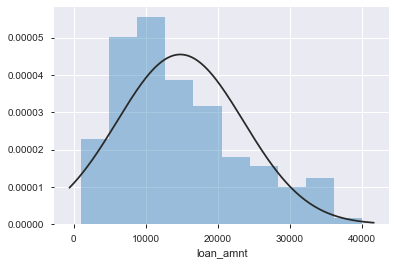

In [76]:
sns.distplot(numerical_values.loan_amnt, bins=10, fit=norm, kde=False)

In [77]:
final_model_data['loan_amnt'] = np.cbrt(final_model_data['loan_amnt'])

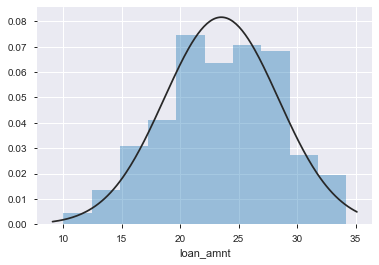

In [78]:
sns.distplot(final_model_data.loan_amnt, bins=10, fit=norm, kde=False)

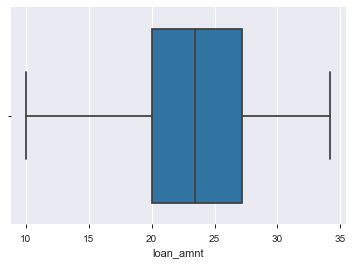

In [79]:
ax = sns.boxplot(x=final_model_data.loan_amnt)

### Debt-to-Income Ratio

In [80]:
numerical_values.dti.describe()

count    1.187381e+06
mean     1.834413e+01
std      9.651913e+00
min     -1.000000e+00
25%      1.194000e+01
50%      1.772000e+01
75%      2.420000e+01
max      9.990000e+02
Name: dti, dtype: float64

In [81]:
# Removing negative value
negative_dti = numerical_values[numerical_values.dti < 0].index
negative_dti

Int64Index([1014615, 1681348], dtype='int64')

In [82]:
final_model_data.drop(negative_dti, inplace=True)

In [83]:
# Confirming removal of negative values
final_model_data.dti.describe()

count    1.079553e+06
mean     1.844939e+01
std      8.448310e+00
min      0.000000e+00
25%      1.222000e+01
50%      1.794000e+01
75%      2.429000e+01
max      1.144400e+02
Name: dti, dtype: float64

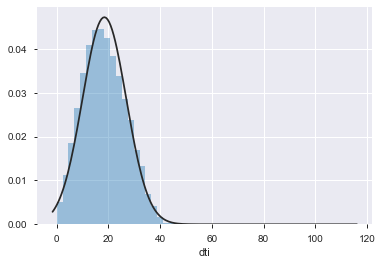

In [84]:
sns.distplot(final_model_data.dti, fit=norm, kde=False)

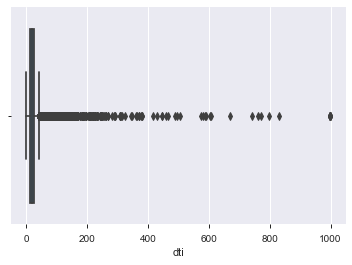

In [85]:
ax = sns.boxplot(x=numerical_values.dti)

In [86]:
# Removing outliers
y=numerical_values.dti
dti_outliers = y.between(y.quantile(.05), y.quantile(.95))

In [87]:
print(dti_outliers.value_counts())
# Getting indices of outliers
index_names = final_model_data[~dti_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting rows to drop.

True     1068752
False     118629
Name: dti, dtype: int64
Int64Index([      9,      12,      21,      33,      41,      72,      78,
                 79,      85,     117,
            ...
            2260418, 2260423, 2260455, 2260489, 2260549, 2260563, 2260635,
            2260641, 2260649, 2260677],
           dtype='int64', length=103151)


/Users/rogerlefort/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [88]:
# Removing outliers
final_model_data.drop(index_names, inplace=True)

final_model_data.shape

(976402, 56)

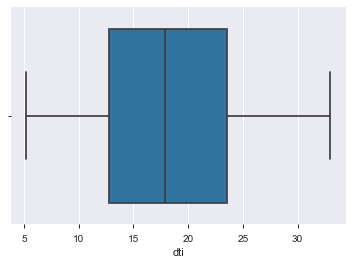

In [89]:
ax = sns.boxplot(x=final_model_data.dti)

### FICO Score

In [90]:
final_model_data.fico_range_low.describe()

count    976402.000000
mean        694.699801
std          30.651964
min         660.000000
25%         670.000000
50%         685.000000
75%         710.000000
max         845.000000
Name: fico_range_low, dtype: float64

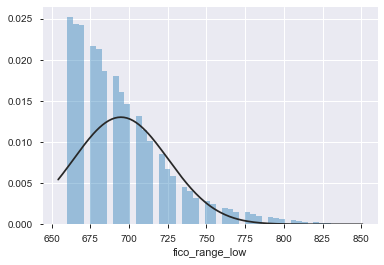

In [91]:
sns.distplot(final_model_data.fico_range_low, fit=norm, kde=False)

In [92]:
# Testing for skewness
from scipy.stats import shapiro
shapiro(final_model_data.fico_range_low)[0]

/Users/rogerlefort/anaconda3/envs/loanDefault/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning:

p-value may not be accurate for N > 5000.



0.8844083547592163

Since the p-value is greater than 0.05 we won't transform this feature

### Revolving balance

In [94]:
final_model_data.revol_bal.describe()

count    976402.000000
mean      15837.201045
std       16876.016902
min           0.000000
25%        6571.000000
50%       11736.000000
75%       19961.000000
max      814300.000000
Name: revol_bal, dtype: float64

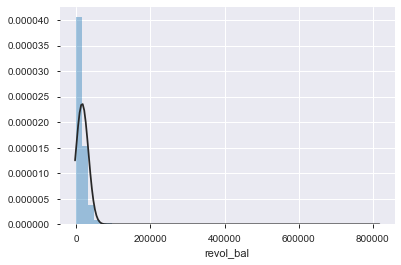

In [93]:
sns.distplot(final_model_data.revol_bal, fit=norm, kde=False)

In [98]:
final_model_data.revol_bal = (np.cbrt(final_model_data.revol_bal))

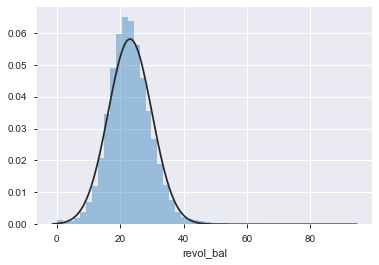

In [99]:
sns.distplot(final_model_data.revol_bal, fit=norm, kde=False)

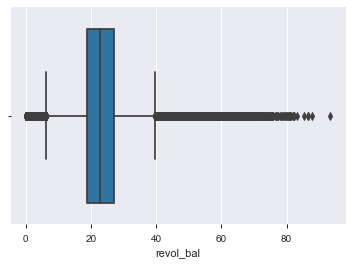

In [100]:
ax = sns.boxplot(x=final_model_data.revol_bal)

In [104]:
# Removing outliers
y=final_model_data.revol_bal
revol_bal_outliers = y.between(y.quantile(.05), y.quantile(.95))

In [105]:
print(revol_bal_outliers.value_counts())
# Getting indices of outliers
index_names = final_model_data[~revol_bal_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting rows to drop.

True     878775
False     97627
Name: revol_bal, dtype: int64
Int64Index([      7,      14,      25,      27,      45,      49,      56,
                100,     108,     116,
            ...
            2260626, 2260639, 2260642, 2260645, 2260648, 2260673, 2260684,
            2260685, 2260686, 2260691],
           dtype='int64', length=97627)


In [106]:
# Removing outliers
final_model_data.drop(index_names, inplace=True)

final_model_data.shape

(878775, 56)

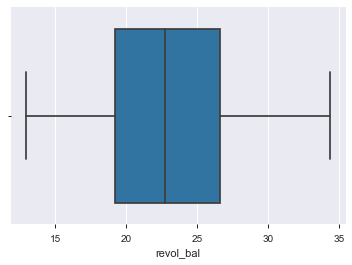

In [107]:
ax = sns.boxplot(x=final_model_data.revol_bal)

### Total Accounts

In [110]:
final_model_data.total_acc.describe()

count    878775.000000
mean         25.363715
std          11.635892
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         176.000000
Name: total_acc, dtype: float64

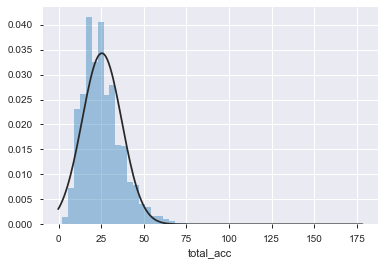

In [113]:
sns.distplot(final_model_data.total_acc, fit=norm, kde=False)

In [116]:
final_model_data.total_acc = np.log(final_model_data.total_acc)

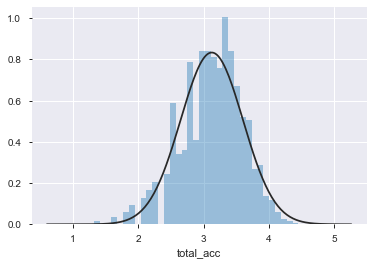

In [117]:
sns.distplot(final_model_data.total_acc, fit=norm, kde=False)

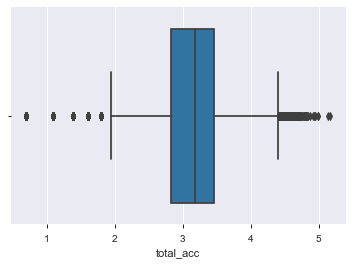

In [118]:
ax = sns.boxplot(x=final_model_data.total_acc)

In [119]:
# Removing outliers
y=final_model_data.total_acc
total_acc_outliers = y.between(y.quantile(.05), y.quantile(.95))

In [120]:
print(total_acc_outliers.value_counts())
# Getting indices of outliers
index_names = final_model_data[~total_acc_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting rows to drop.

True     797916
False     80859
Name: total_acc, dtype: int64
Int64Index([      5,      15,      23,      38,      40,      59,      60,
                 86,      95,     142,
            ...
            2260485, 2260503, 2260523, 2260537, 2260538, 2260544, 2260574,
            2260602, 2260629, 2260633],
           dtype='int64', length=80859)


In [121]:
# Removing outliers
final_model_data.drop(index_names, inplace=True)

final_model_data.shape

(797916, 56)

### Average Current Balance

In [134]:
final_model_data.avg_cur_bal.describe()

count    797916.000000
mean      12729.821607
std       13463.143446
min          72.000000
25%        3282.000000
50%        7537.000000
75%       18241.000000
max      341236.000000
Name: avg_cur_bal, dtype: float64

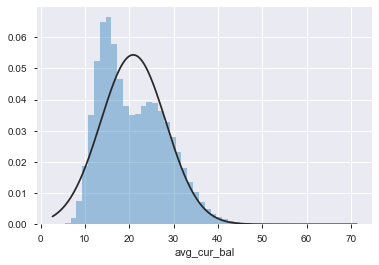

In [139]:
sns.distplot(final_model_data.avg_cur_bal, fit=norm, kde=False)

In [137]:
final_model_data.avg_cur_bal = np.cbrt(final_model_data.avg_cur_bal)

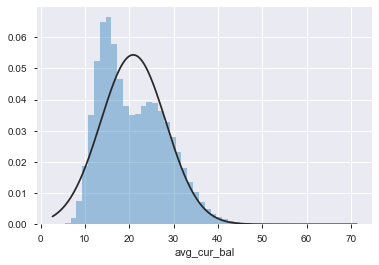

In [141]:
sns.distplot(final_model_data.avg_cur_bal, fit=norm, kde=False)

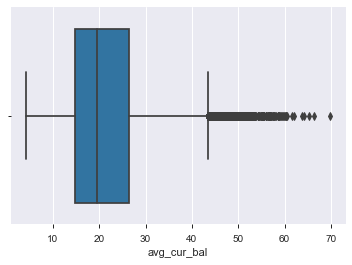

In [142]:
ax = sns.boxplot(x=final_model_data.avg_cur_bal)

In [144]:
# Removing outliers
y=final_model_data.avg_cur_bal
avg_cur_bal_outliers = y.between(y.quantile(.05), y.quantile(.95))

In [145]:
print(avg_cur_bal_outliers.value_counts())
# Getting indices of outliers
index_names = final_model_data[~avg_cur_bal_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting rows to drop.

True     718188
False     79728
Name: avg_cur_bal, dtype: int64
Int64Index([     19,      26,      36,      64,      76,     102,     106,
                110,     113,     123,
            ...
            2260232, 2260319, 2260371, 2260374, 2260445, 2260484, 2260511,
            2260536, 2260623, 2260643],
           dtype='int64', length=79728)


In [146]:
# Removing outliers
final_model_data.drop(index_names, inplace=True)

final_model_data.shape

(718188, 56)

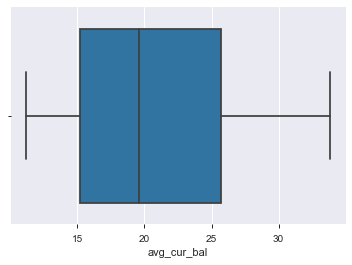

In [147]:
ax = sns.boxplot(x=final_model_data.avg_cur_bal)

### Total open to buy on revolving bankcards

In [159]:
final_model_data.bc_open_to_buy.describe()

count    646488.000000
mean         17.113497
std           6.672125
min           5.192494
25%          11.899626
50%          16.546243
75%          21.898291
max          32.651365
Name: bc_open_to_buy, dtype: float64

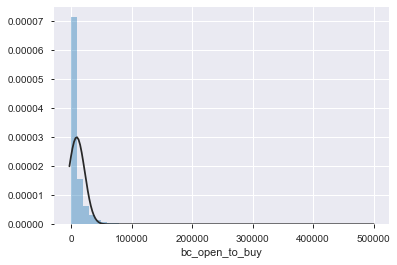

In [151]:
sns.distplot(final_model_data.bc_open_to_buy, fit=norm, kde=False)

In [152]:
final_model_data.bc_open_to_buy = np.cbrt(final_model_data.bc_open_to_buy)

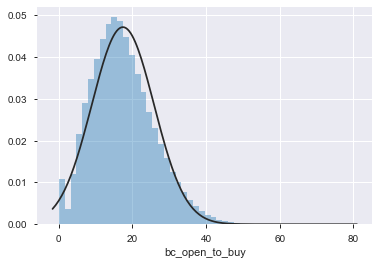

In [153]:
sns.distplot(final_model_data.bc_open_to_buy, fit=norm, kde=False)

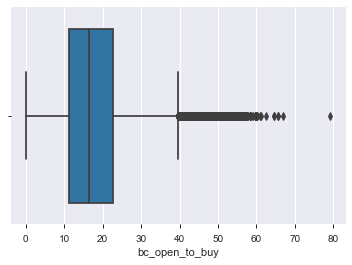

In [154]:
ax = sns.boxplot(x=final_model_data.bc_open_to_buy)

In [155]:
# Removing outliers
y=final_model_data.bc_open_to_buy
bc_open_to_buy_outliers = y.between(y.quantile(.05), y.quantile(.95))

In [156]:
print(bc_open_to_buy_outliers.value_counts())
# Getting indices of outliers
index_names = final_model_data[~bc_open_to_buy_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting rows to drop.

True     646488
False     71700
Name: bc_open_to_buy, dtype: int64
Int64Index([      1,      17,      43,     107,     128,     150,     162,
                178,     199,     202,
            ...
            2260406, 2260437, 2260446, 2260492, 2260508, 2260512, 2260528,
            2260609, 2260672, 2260675],
           dtype='int64', length=71700)


In [157]:
# Removing outliers
final_model_data.drop(index_names, inplace=True)

final_model_data.shape

(646488, 56)

### Total Highest Credit Limit

In [158]:
final_model_data.tot_hi_cred_lim.describe()

count    6.464880e+05
mean     1.504081e+05
std      1.195998e+05
min      3.200000e+03
25%      5.651275e+04
50%      1.083640e+05
75%      2.226470e+05
max      9.999999e+06
Name: tot_hi_cred_lim, dtype: float64

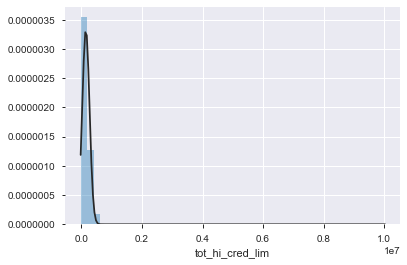

In [160]:
sns.distplot(final_model_data.tot_hi_cred_lim, fit=norm, kde=False)

In [161]:
final_model_data.tot_hi_cred_lim = np.cbrt(final_model_data.tot_hi_cred_lim)

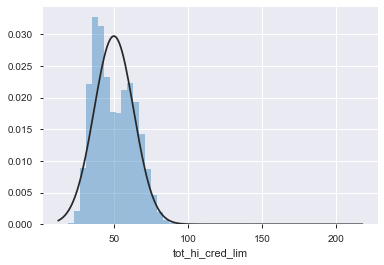

In [162]:
sns.distplot(final_model_data.tot_hi_cred_lim, fit=norm, kde=False)

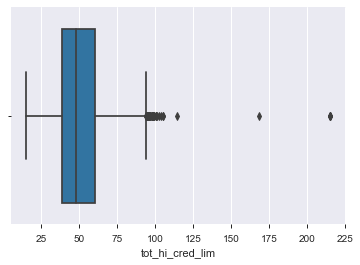

In [163]:
ax = sns.boxplot(x=final_model_data.tot_hi_cred_lim)

### Total current balance of all accounts, excluding mortgage

In [164]:
final_model_data.total_bal_ex_mort.describe()

count    646488.000000
mean      47667.497380
std       34329.685791
min         351.000000
25%       25730.000000
50%       38995.000000
75%       59009.000000
max      638471.000000
Name: total_bal_ex_mort, dtype: float64

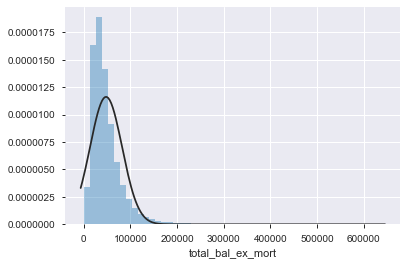

In [165]:
sns.distplot(final_model_data.total_bal_ex_mort, fit=norm, kde=False)

In [166]:
final_model_data.total_bal_ex_mort = np.cbrt(final_model_data.total_bal_ex_mort)

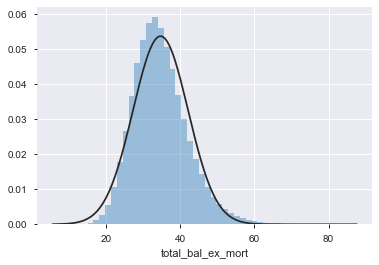

In [167]:
sns.distplot(final_model_data.total_bal_ex_mort, fit=norm, kde=False)

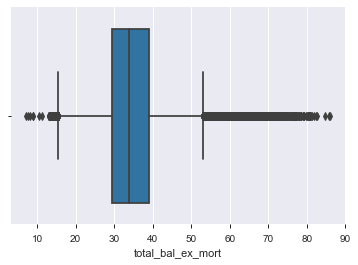

In [168]:
ax = sns.boxplot(x=final_model_data.total_bal_ex_mort)

In [169]:
# Removing outliers
y=final_model_data.total_bal_ex_mort
total_bal_ex_mort_outliers = y.between(y.quantile(.05), y.quantile(.95))

In [170]:
print(total_bal_ex_mort_outliers.value_counts())
# Getting indices of outliers
index_names = final_model_data[~total_bal_ex_mort_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting rows to drop.

True     581840
False     64648
Name: total_bal_ex_mort, dtype: int64
Int64Index([      0,      46,      47,      89,      94,     237,     259,
                267,     268,     275,
            ...
            2260405, 2260451, 2260462, 2260464, 2260486, 2260516, 2260524,
            2260529, 2260560, 2260657],
           dtype='int64', length=64648)


In [171]:
# Removing outliers
final_model_data.drop(index_names, inplace=True)

final_model_data.shape

(581840, 56)

### Total Bank Card limit

In [172]:
final_model_data.total_bc_limit.describe()

count    581840.000000
mean      18585.407325
std       12282.810413
min         200.000000
25%        9100.000000
50%       15700.000000
75%       25400.000000
max      160400.000000
Name: total_bc_limit, dtype: float64

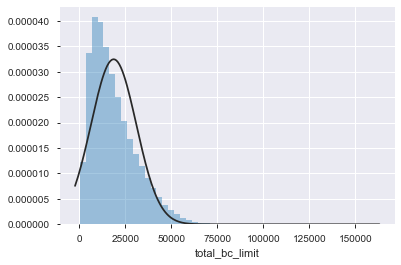

In [174]:
sns.distplot(final_model_data.total_bc_limit, fit=norm, kde=False)

In [175]:
final_model_data.total_bc_limit = np.cbrt(final_model_data.total_bc_limit)

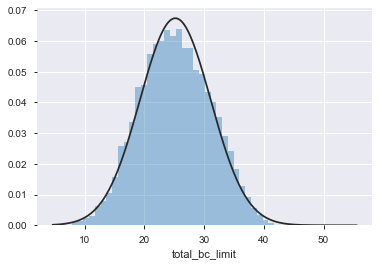

In [176]:
sns.distplot(final_model_data.total_bc_limit, fit=norm, kde=False)

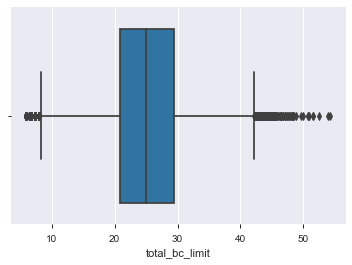

In [177]:
ax = sns.boxplot(x=final_model_data.total_bc_limit)

In [179]:
# Removing outliers
y=final_model_data.total_bc_limit
total_bc_limit_outliers = y.between(y.quantile(.05), y.quantile(.95))

In [180]:
print(total_bc_limit_outliers.value_counts())
# Getting indices of outliers
index_names = final_model_data[~total_bc_limit_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting rows to drop.

True     525182
False     56658
Name: total_bc_limit, dtype: int64
Int64Index([    143,     169,     251,     286,     301,     321,     333,
                453,     458,     464,
            ...
            2260189, 2260244, 2260269, 2260322, 2260404, 2260428, 2260469,
            2260500, 2260519, 2260566],
           dtype='int64', length=56658)


In [181]:
# Removing outliers
final_model_data.drop(index_names, inplace=True)

final_model_data.shape

(525182, 56)

### Total installment high credit/credit limit

In [182]:
final_model_data.total_il_high_credit_limit.describe()

count    525182.000000
mean      38857.495343
std       24533.739726
min           0.000000
25%       21000.000000
50%       34625.000000
75%       53169.000000
max      347673.000000
Name: total_il_high_credit_limit, dtype: float64

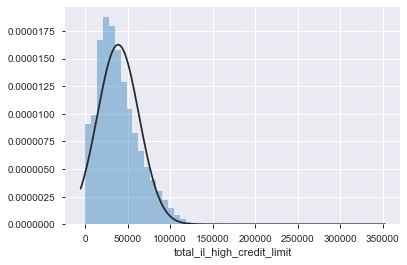

In [183]:
sns.distplot(final_model_data.total_il_high_credit_limit, fit=norm, kde=False)

In [184]:
final_model_data.total_il_high_credit_limit = np.cbrt(final_model_data.total_il_high_credit_limit)

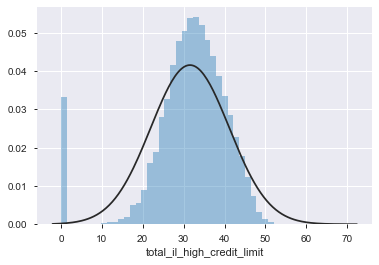

In [185]:
sns.distplot(final_model_data.total_il_high_credit_limit, fit=norm, kde=False)

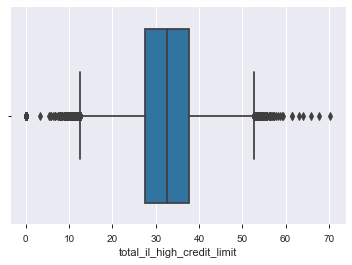

In [186]:
ax = sns.boxplot(x=final_model_data.total_il_high_credit_limit)

In [189]:
# Removing outliers
y=final_model_data.total_il_high_credit_limit
total_il_high_credit_limit_outliers = y.between(y.quantile(.05), y.quantile(.95))

In [191]:
print(total_il_high_credit_limit_outliers.value_counts())
# Getting indices of outliers
index_names = final_model_data[~total_il_high_credit_limit_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting rows to drop.

True     472682
False     52500
Name: total_il_high_credit_limit, dtype: int64
Int64Index([      4,      22,      28,      29,      32,      62,      97,
                211,     263,     264,
            ...
            2260303, 2260407, 2260422, 2260435, 2260436, 2260472, 2260498,
            2260581, 2260663, 2260666],
           dtype='int64', length=52500)


In [192]:
# Removing outliers
final_model_data.drop(index_names, inplace=True)

final_model_data.shape

(472682, 56)

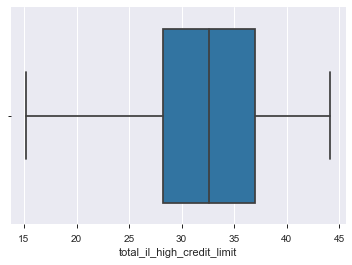

In [195]:
ax = sns.boxplot(x=final_model_data.total_il_high_credit_limit)

In [194]:
final_model_data.to_csv('lending-club/transformed_final_data')